<a href="https://colab.research.google.com/github/LarsonBodden/Car-Purchasing-Model-Project/blob/main/Car_Purchasing_Model_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Larson Bodden 

- Project 2
- 8/7/22

## Project Part 1

1) Source of data
- https://www.kaggle.com/datasets/dev0914sharma/car-purchasing-model

2) Brief description of data
- This data contain the information of the various people with the following detail which can help us to find out the better prediction and also help us to train our model to predict the correct value and get a good F1 Score.

3) What is the target?
- Car Purchase Amount

4) Is this a classification or regression problem?
- This is regression problem because i will be a predicting a discrete class label.

5) How many features?
- 6 features. I will also drop customer name and customer email because it does not add or change anything on the data set. 

6) How many rows of data.
- 500 Rows

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
- I do not forsee any challenges

In [82]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

## Project Part 2

In [84]:
# Load data from csv file
filename = '/content/drive/MyDrive/Coding Dojo - Data Science Bootcamp/Colab Notebooks/Projects/Project 2/Car_Purchasing_Data.csv'
df = pd.read_csv(filename)
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [85]:
# computing number of rows & computing number of columns
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 500 rows, and 9 columns.
The rows represent 500 observations, and the columns represent 8 features and 1 target variable.


In [86]:
# Drop unceccessary columns
df = df.drop(columns=['Customer Name', 'Customer e-mail', 'Country'])
df.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [87]:
# Checking for duplicates
df.duplicated().sum()

0

In [88]:
# identify and address missing values 
df.isna().sum()

Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

- No categorical values

In [89]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [90]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Car Purchase Amount'],axis=1),
                                                   df['Car Purchase Amount'],
                                                   test_size=0.2,
                                                   random_state=0)

x_train.shape, x_test.shape

((400, 5), (100, 5))

In [91]:
discrete_variable = [var for var in x_train.columns if x_train[var].dtype != 'O' and x_train[var].nunique() < 10]
continuous_variable = [var for var in x_train.columns if x_train[var].dtype != 'O' and var not in discrete_variable]

In [92]:
discrete_variable

['Gender']

In [93]:
continuous_variable

['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']

In [94]:
def diagnostic_plot(df, var):
    fig = plt.figure(figsize=(12,4))
    
    plt.subplot(1,3,1)
    df[var].plot(kind='hist',bins=50)
    plt.title('Histogram')
    
    plt.subplot(1,3,2)
    stats.probplot(df[var], dist='norm', plot=plt)
    plt.ylabel('RM Quantiles')
    
    plt.subplot(1,3,3)
    sns.boxplot(y=df[var])
    plt.title('Boxplot')
    
    plt.show()

- We can see that our continuous variables are normally distributed because the values align to the 45 degree line of the Q-Q plot and except Net worth all the variables have outliers on both tails. Networth have outliers on right tail only.

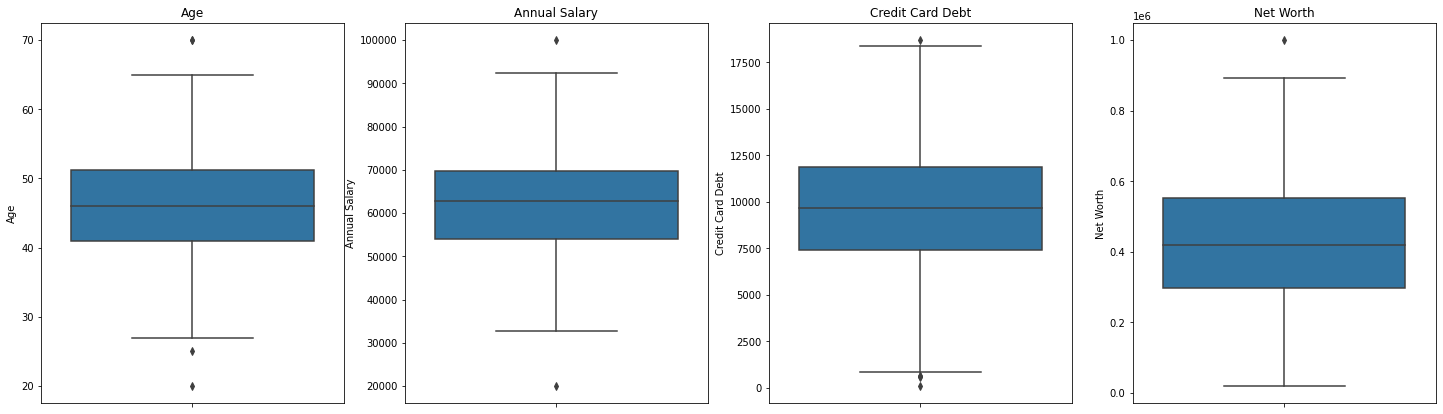

In [95]:
# we can directly use boxplot to visualize outliers.
# boxplots are standard way of displaying the distribution of a variable, utilising
# the first quantile, the median, the third quantile, and the whiskers

i = 1
fig = plt.figure(figsize=(25,7))

for var in continuous_variable:
    plt.subplot(1,4,i)
    sns.boxplot(y=x_train[var])
    plt.title(var)
    i = i + 1

## Project Part 3

In [96]:
df.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [97]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


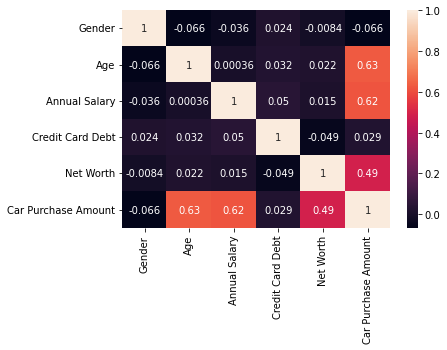

In [98]:
sns.heatmap(df.corr(),annot=True)

- Based on the correlation map above we can see that with our target variable(car purchase amount) there is a positive correlation with age and annual salary. Moderate correlation with network and low correlation with credit card debt. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


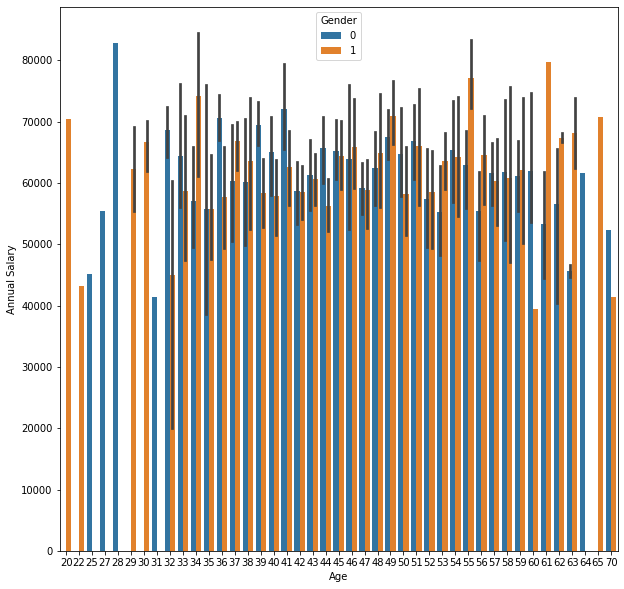

In [99]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(df['Age'], df['Annual Salary'], hue = df["Gender"])
plt.show()

- Looking at the visual above we see that an Age 29 Male holds the highest annual salary amongst the group. Males tend to hold high annual salaries than females according to the bar graph.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


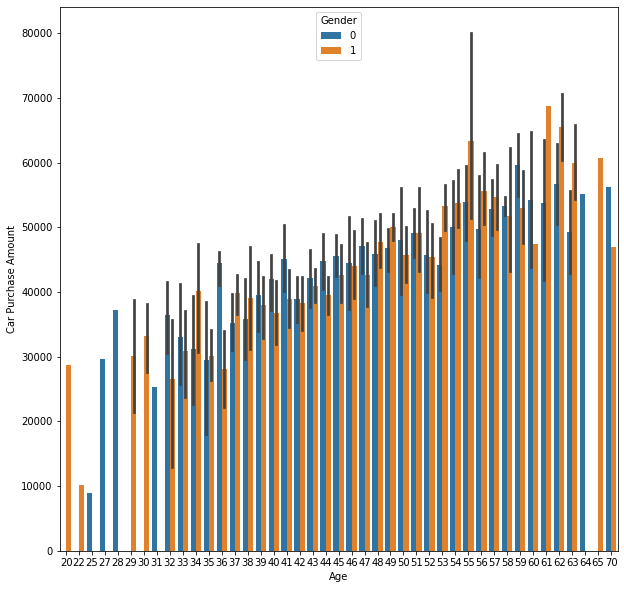

In [100]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(df['Age'], df['Car Purchase Amount'], hue = df["Gender"])
plt.show()

- Compared to the previous bar graph, although the 29 male has the highest annual salary it seems they do not purchase the most expensive car. 
- It seems the older the customer the more likely they are to purchase a more expensive car. As you can see the bar graph trend forward for both male and female. 

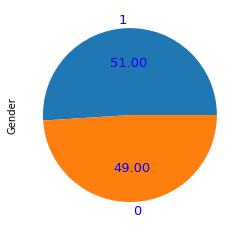

In [101]:
x_train['Gender'].value_counts().plot.pie(fontsize=13, autopct = '%.2f',
                                        textprops={'color':'b'})
plt.show()

- We have almost equal ratio of male and female as a customer.

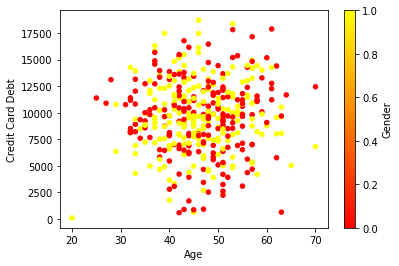

In [102]:
x_train.plot.scatter(x = 'Age', y = 'Credit Card Debt', c = 'Gender',
                    cmap = plt.get_cmap('autumn'), sharex=False)
plt.show()

- We see on the scatterplot there is higher correlaiton of credit card debt amongst the yellow dots vs the red dots. Ages 40-60 seems to have a signinficant amount of debt compared to the other age groups. 

## Part 4 

In [103]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# We are asking for the number of Principal Components that will retain 95% of the variance in the original features
pca = PCA(n_components = .95)

# Preprocessing Pipeline, so we can reuse it for other model types:
# We have only numeric data, so there is no need for a column transformer.  
# We can perform the same processing steps on all columns.
processing = make_pipeline(scaler, pca)

print('Shape before PCA:', x_train.shape)
print('Shape after PCA:', processing.fit_transform(x_train).shape)
print('Column count reduced by: ', x_train.shape[1] - processing.fit_transform(x_train).shape[1])

Shape before PCA: (400, 5)
Shape after PCA: (400, 5)
Column count reduced by:  0


- - The columns remained the same while retaining 95% of the information (variance) of the original features.

In [104]:
# Instantiate your model and fit it on the training set.
scaler = StandardScaler()
lin_reg = LinearRegression()

lin_reg_pipe = make_pipeline(scaler, lin_reg)

lin_reg_pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [105]:
train_pred = lin_reg_pipe.predict(x_train)
test_pred = lin_reg_pipe.predict(x_test)

In [106]:
# Calculating R2
train_r2 = np.corrcoef(y_train, train_pred)[0][1]**2
test_r2 = np.corrcoef(y_test, test_pred)[0][1]**2

print(f'Model Training MAE: {train_r2}')
print(f'Model Testing MAE: {test_r2}')

Model Training MAE: 0.9995033208092067
Model Testing MAE: 0.9994951061385793


- The model can explain 80% of the variation in the target.

In [107]:
# Calculating MAE
train_MAE = np.mean(np.abs(train_pred - y_train))
test_MAE = np.mean(np.abs(test_pred - y_test))

print(f'Model Training MAE: {train_MAE}')
print(f'Model Testing MAE: {test_MAE}')

Model Training MAE: 205.80058298641313
Model Testing MAE: 216.36020860061058


- The model was off on its predictions by 205 for the training set and 216 for the test set.

In [108]:
# Calculating MSE
train_MSE = np.mean(np.abs(train_pred - y_train)**2)
test_MSE = np.mean(np.abs(test_pred - y_test)**2)

print(f'Model Training MAE: {train_MSE}')
print(f'Model Testing MAE: {test_MSE}')

Model Training MAE: 56897.071556738934
Model Testing MAE: 61658.60166646037


In [109]:
# Calculating RMSE
train_RMSE = np.sqrt(np.mean(np.abs(train_pred - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_pred - y_test)**2))

print(f'Model Training MAE: {train_RMSE}')
print(f'Model Testing MAE: {test_RMSE}')

Model Training MAE: 238.53107042215473
Model Testing MAE: 248.3115012770459


- Model Training score is 238. Much lower than MSE which is better for our model.

In [110]:
# Random Forest Model
rf = RandomForestRegressor(random_state = 42)

In [111]:
# Looking at some hyperparameters that seem tunable
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [112]:
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [113]:
rf.predict(x_test)

array([39204.6286048, 43485.8525524, 30847.5717818, 50601.2573446,
       38770.3847447, 52245.8831728, 58511.51785  , 61107.4447999,
       42548.3346281, 31855.6603956, 46716.6775277, 53699.4095015,
       51680.9469099, 62912.3616847, 30579.2059517, 33105.2759096,
       46253.3452989, 55208.3927392, 42452.5390093, 19844.1418544,
       48556.088997 , 36931.5956529, 46864.4135016, 31996.5090913,
       66853.0719533, 42707.9203284, 43590.5620503, 48250.4197442,
       57773.4565244, 58595.8171948, 46043.556127 , 39976.2672538,
       54052.1848654, 43241.2746551, 64494.7160319, 60013.2890022,
       35390.0628253, 61918.8842815, 42659.0697273, 42928.3509049,
       54218.1814902, 33364.0835863, 33343.8122334, 39215.3713049,
       40576.3387877, 45573.887905 , 46278.8434561, 53965.2996222,
       38035.9002204, 37738.633315 , 36019.339751 , 39890.4055337,
       50287.0837544, 52722.903564 , 39931.7856499, 33188.7265766,
       46088.5006044, 53854.2593408, 44788.8453063, 52470.9622

In [114]:
rf_train_score = rf.score(x_train, y_train)
rf_test_score = rf.score(x_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9917747220095572
0.9548744393813717


- Linear regression model perfomed better than the random forest model.

In [115]:
rf_9 = RandomForestRegressor(max_depth = 9, random_state = 42)
rf_9.fit(x_train, y_train)
rf_9_train_score = rf_9.score(x_train, y_train)
rf_9_test_score = rf_9.score(x_test, y_test)
print(rf_9_train_score)
print(rf_9_test_score)

0.9911441382059085
0.9548675026278338


In [116]:
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

19

In [117]:
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestRegressor(max_depth=depth)
   model.fit(x_train, y_train)
   scores.loc[depth, 'Train Score'] = model.score(x_train, y_train)
   scores.loc[depth, 'Test Score'] = model.score(x_test, y_test)
   scores.head()

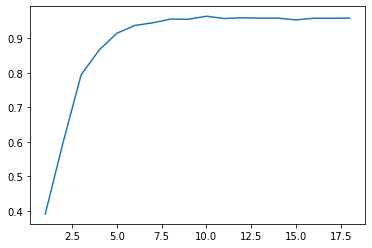

In [118]:
plt.plot(scores['Test Score'])

In [119]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
10,0.963806,0.991897
12,0.959504,0.990942
18,0.958302,0.992138
13,0.958204,0.991465
14,0.958197,0.992318


In [120]:
# Decision Tree Model
tree = DecisionTreeRegressor(criterion='mae',max_depth=20)
tree.fit(x_train,y_train)
print(tree.score(x_test,y_test))

0.8570011792899006


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


In [122]:
# Decision Tree Model
dec_tree = DecisionTreeRegressor(random_state = 42)

In [124]:
dec_tree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [125]:
train_preds = dec_tree.predict(x_train)
test_preds = dec_tree.predict(x_test)

In [126]:
# evaluate the model
train_score = dec_tree.score(x_train, y_train)
test_score = dec_tree.score(x_test, y_test)
print(train_score)
print(test_score)



1.0
0.8788453261702506


- The decision tree had a much higher R^2 score on the training data than it did on the test data.  This is an indication that the model is overfitting. 

In [127]:
# Looking at options for tuning this model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [128]:
# What was the depth of our default tree?
dec_tree.get_depth()

15

In [132]:
# List of values to try for max_depth:
depths = list(range(2, 36)) # will try every value between 2 and 36
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(x_train, y_train)
    train_score = dec_tree.score(x_train, y_train)
    test_score = dec_tree.score(x_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

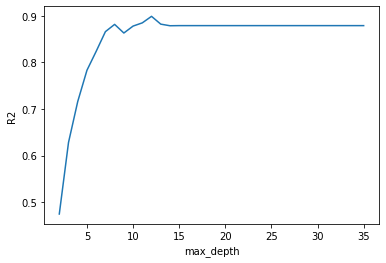

In [133]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

- From the image above, it looks like the best score for the model is when the parameter max_depth is 13.

In [134]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
12,0.898778,0.999953
11,0.884767,0.999426
13,0.882031,0.999997
8,0.881507,0.988246
23,0.878845,1.0


In [135]:
# Let's run the model with our optimized value for max_depth
dec_tree_13 = DecisionTreeRegressor(max_depth = 13, random_state = 42)
dec_tree_13.fit(x_train, y_train)
train_13_score = dec_tree_13.score(x_train, y_train)
test_13_score = dec_tree_13.score(x_test, y_test)
print(train_13_score)
print(test_13_score)

0.9999974596514819
0.8820313738418887


-  The training and test results have moved closer to each other meaning we have reduced overfitting.



- Linear regression performed at 99%. Random forest at 95% and Decison tree at 88%. Linear regression performed the highest making it the best suited model.

# Recommendation

- Based on the analysis and model, the company should target the older population solely because they are more likely to purchase a car with a higher price tag. The average car sale price seems to be about 44,000 but the older population could be more comfortable purchasing a car higher than that.